<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/DeepLearning/1_Introduccion/ejercicios/ejercicios_solucion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

### Ejercicio 1
Generar un tensor llamado x cuyo contenido sea el siguiente:

![Imgur](https://i.imgur.com/rfaKGUG.png)

In [10]:
import torch

x = [2*x for x in range(2*3*5)]
x = torch.tensor(x)
x.reshape(2,3,5)


tensor([[[ 0,  2,  4,  6,  8],
         [10, 12, 14, 16, 18],
         [20, 22, 24, 26, 28]],

        [[30, 32, 34, 36, 38],
         [40, 42, 44, 46, 48],
         [50, 52, 54, 56, 58]]])

### Ejercicio 2
Realizar los cambios necesarios en los siguientes tensores para que sea posible multiplicar cada columna del tensor "X" por el vector "y".

In [50]:
X = torch.ones(2, 4, 5, 3)
y = torch.tensor([1,2,3,4,5])
y = y.reshape(1,5,1)
X*y

tensor([[[[1., 1., 1.],
          [2., 2., 2.],
          [3., 3., 3.],
          [4., 4., 4.],
          [5., 5., 5.]],

         [[1., 1., 1.],
          [2., 2., 2.],
          [3., 3., 3.],
          [4., 4., 4.],
          [5., 5., 5.]],

         [[1., 1., 1.],
          [2., 2., 2.],
          [3., 3., 3.],
          [4., 4., 4.],
          [5., 5., 5.]],

         [[1., 1., 1.],
          [2., 2., 2.],
          [3., 3., 3.],
          [4., 4., 4.],
          [5., 5., 5.]]],


        [[[1., 1., 1.],
          [2., 2., 2.],
          [3., 3., 3.],
          [4., 4., 4.],
          [5., 5., 5.]],

         [[1., 1., 1.],
          [2., 2., 2.],
          [3., 3., 3.],
          [4., 4., 4.],
          [5., 5., 5.]],

         [[1., 1., 1.],
          [2., 2., 2.],
          [3., 3., 3.],
          [4., 4., 4.],
          [5., 5., 5.]],

         [[1., 1., 1.],
          [2., 2., 2.],
          [3., 3., 3.],
          [4., 4., 4.],
          [5., 5., 5.]]]])

###Ejercicio 3
Descargar el dataset FashionMNIST y guardar en un tensor todas las imágenes de bolsos (label 8). 

Tip: use la función torch.stack para apilar una lista de tensores en uno solo

In [34]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

bag_imgs = []
for i in range(len(training_data)):
    img, label = training_data[i]
    if label == 8: bag_imgs.append(img)

bag_tensor = torch.stack(bag_imgs)



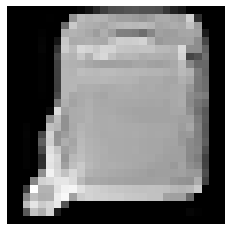

In [40]:
idx = torch.randint(len(bag_imgs), size=(1,)).item()
plt.axis("off")
plt.imshow(bag_tensor[idx,0,:,:], cmap="gray")
plt.show()

###Ejercicio 4
Use autograd para graficar el gradiente de la siguiente función aplicada sobre el tensor "x".

$$f(x) = \tan(2x+ \frac{\pi}{2}) $$

Graficar entre 0 y 2$\pi$.

In [47]:
import math
x = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
fx = torch.tan(2*x+math.pi/2).sum()
fx

tensor(-1.3420e+08, grad_fn=<SumBackward0>)

In [48]:
print('fx:')
print(fx.grad_fn)
print(fx.grad_fn.next_functions)
print(fx.grad_fn.next_functions[0][0].next_functions)
print(fx.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(fx.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)


fx:
((<TanBackward0 object at 0x7fe4b71d0b90>, 0),)
((<AddBackward0 object at 0x7fe4b715df50>, 0),)
((<MulBackward0 object at 0x7fe4b71d0b90>, 0), (None, 0))
((<AccumulateGrad object at 0x7fe4b715df50>, 0), (None, 0))


tensor([1.0467e+15, 8.0000e+00, 2.6667e+00, 2.0000e+00, 2.6667e+00, 8.0000e+00,
        1.4064e+16, 8.0000e+00, 2.6667e+00, 2.0000e+00, 2.6667e+00, 8.0000e+00,
        1.7531e+13, 8.0000e+00, 2.6667e+00, 2.0000e+00, 2.6667e+00, 8.0000e+00,
        2.3770e+13, 8.0000e+00, 2.6667e+00, 2.0000e+00, 2.6667e+00, 8.0000e+00,
        1.5627e+15])


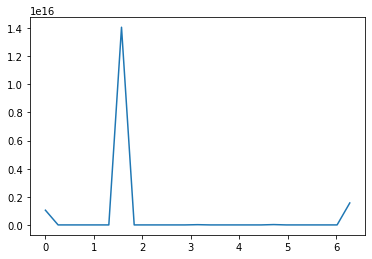

In [49]:
fx.backward()
print(x.grad)
plt.plot(x.detach(), x.grad.detach())
